## Preprocessing

In [15]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import necessary libraries
from google.colab import files
import os
import pandas as pd

# Upload and configure Kaggle API key
uploaded = files.upload()  # Prompt to upload the kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle API and download the dataset
!pip install kaggle
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset
!unzip usa-real-estate-dataset.zip

# Check the files to confirm the correct file name
print("Files in directory:", os.listdir('.'))

# Define the file name
file_name = 'realtor-data.csv'

# Load the dataset and print the first 5 rows
if file_name in os.listdir('.'):
    df = pd.read_csv(file_name)
    print(df.head(5))  # Print the first 5 rows of the dataframe
else:
    print(f"File {file_name} not found in the directory.")





Saving kaggle.json to kaggle (5).json
usa-real-estate-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  usa-real-estate-dataset.zip
replace realtor-data.zip.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: realtor-data.zip.csv    
Files in directory: ['.config', 'usa_real_estate_dataset', 'realtor-data.zip.csv', 'kaggle (1).json', 'realtor-data.csv', 'kaggle (4).json', 'usa-real-estate-dataset.zip', 'kaggle (2).json', 'kaggle.json', 'kaggle (5).json', 'kaggle (3).json', 'sample_data']
   brokered_by    status     price  bed  bath  acre_lot     street        city        state  zip_code  house_size prev_sold_date
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0    Adjuntas  Puerto Rico     601.0       920.0            NaN
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0    Adjuntas  Puerto Rico     601.0      1527.0            NaN
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  14

In [17]:
# List of cities to filter by
cities = ['Kansas City', 'Topeka', 'Denver', 'Dallas']

# Loop through each city and display the first 5 rows for that city
for city in cities:
    # Filter the DataFrame for the city
    filtered_df = df[df['city'] == city]

    # Check if the filtered dataframe is empty
    if not filtered_df.empty:
        print(f"First 5 rows for {city}:")
        print(filtered_df.head(5))
    else:
        print(f"No data available for {city}")



First 5 rows for Kansas City:
        brokered_by    status     price  bed  bath  acre_lot     street         city     state  zip_code  house_size prev_sold_date
914988        322.0  for_sale  372000.0  4.0   3.0      0.19  1614471.0  Kansas City  Missouri   64158.0      2300.0     2016-09-09
914989      58270.0  for_sale   25000.0  3.0   2.0      0.35   144563.0  Kansas City  Missouri   64133.0      1884.0     2004-03-22
914990      84610.0  for_sale   69950.0  2.0   1.0      0.19  1648065.0  Kansas City  Missouri   64129.0      1134.0            NaN
914994      33478.0  for_sale  109000.0  2.0   3.0      0.07  1747899.0  Kansas City  Missouri   64134.0      2062.0     2005-01-13
915001      20177.0  for_sale  137500.0  4.0   1.0      0.23  1740406.0  Kansas City  Missouri   64134.0       912.0     2008-02-06
First 5 rows for Topeka:
        brokered_by    status     price   bed  bath  acre_lot     street    city    state  zip_code  house_size prev_sold_date
730228      13706.0  for_s

In [19]:
# List of cities to analyze
cities = ['Kansas City', 'Topeka', 'Denver', 'Dallas']

# Filter the DataFrame for these cities
filtered_df = df[df['city'].isin(cities)]

# Group by city and number of bedrooms, then calculate count and mean price
result = filtered_df.groupby(['city', 'bed']).agg(
    Houses_Available=('price', 'count'),
    Average_Price=('price', 'mean')
).reset_index()

# Format the Average Price to be more readable
result['Average_Price'] = result['Average_Price'].round(2)

print(result)


           city    bed  Houses_Available  Average_Price
0        Dallas    1.0               413      228606.82
1        Dallas    2.0              1588      399111.65
2        Dallas    3.0              3399      474756.44
3        Dallas    4.0              1938      698018.75
4        Dallas    5.0               483     1382225.59
5        Dallas    6.0                86     2103946.91
6        Dallas    7.0                10     5322690.00
7        Dallas    8.0                16     2841325.00
8        Dallas    9.0                 2     8525000.00
9        Dallas   10.0                 1     1597500.00
10       Dallas   14.0                 2     1029500.00
11       Dallas   23.0                 1      680000.00
12       Dallas   28.0                 1     3975000.00
13       Dallas   62.0                 1     6500000.00
14       Dallas  222.0                 1      699000.00
15       Denver    1.0               277      442537.16
16       Denver    2.0               717      56

In [20]:
# List of cities to analyze
cities = ['Kansas City', 'Topeka', 'Denver', 'Dallas']

# Filter the DataFrame for these cities and ensure the number of bedrooms is 5 or less
filtered_df = df[(df['city'].isin(cities)) & (df['bed'] <= 5)]

# Group by city and number of bedrooms ('bed'), then calculate count and mean price
result = filtered_df.groupby(['city', 'bed']).agg(
    Houses_Available=('price', 'count'),
    Average_Price=('price', 'mean')
).reset_index()

# Format the Average Price to be more readable
result['Average_Price'] = result['Average_Price'].round(2)

# Display the results
print(result)


           city  bed  Houses_Available  Average_Price
0        Dallas  1.0               413      228606.82
1        Dallas  2.0              1588      399111.65
2        Dallas  3.0              3399      474756.44
3        Dallas  4.0              1938      698018.75
4        Dallas  5.0               483     1382225.59
5        Denver  1.0               277      442537.16
6        Denver  2.0               717      565145.55
7        Denver  3.0               829      647989.24
8        Denver  4.0               592      894759.51
9        Denver  5.0               213     1438611.55
10  Kansas City  1.0                69      204998.45
11  Kansas City  2.0               387      222657.35
12  Kansas City  3.0               886      272140.28
13  Kansas City  4.0               675      489602.49
14  Kansas City  5.0               157      576180.18
15       Topeka  1.0                 9       63933.33
16       Topeka  2.0                92      104748.36
17       Topeka  3.0        

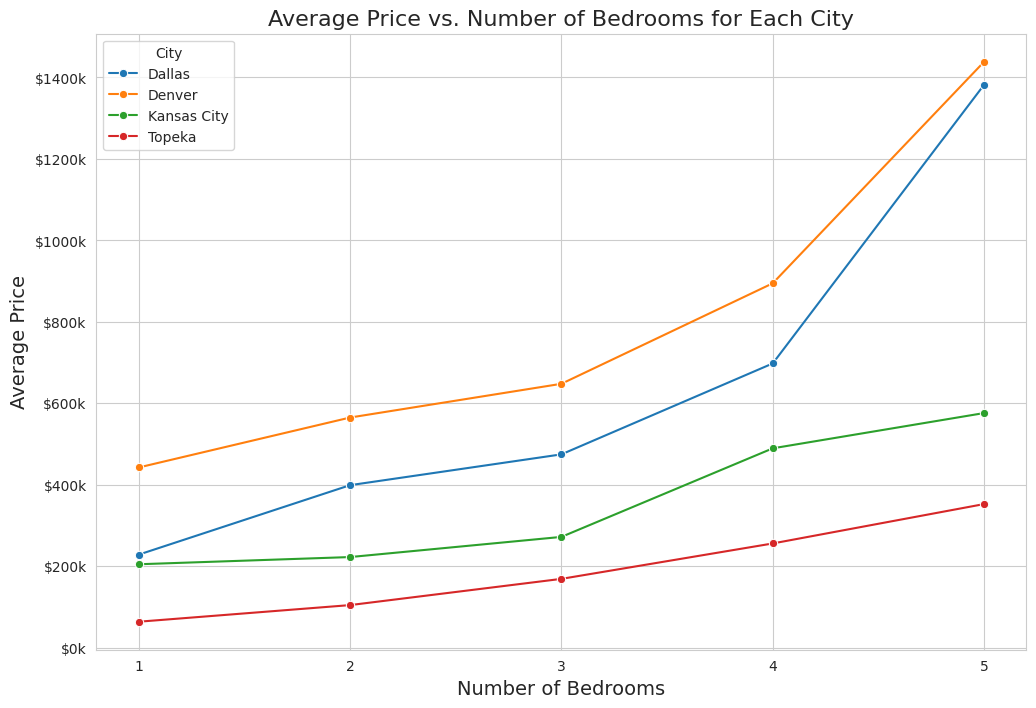

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a line plot
plt.figure(figsize=(12, 8))
lineplot = sns.lineplot(data=result, x='bed', y='Average_Price', hue='city', marker='o')

# Adding titles and labels
plt.title('Average Price vs. Number of Bedrooms for Each City', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(result['bed'].unique())  # Ensure all bedroom categories are shown

# Format the y-axis to show dollar sign and the value
lineplot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

# Show the legend and plot
plt.legend(title='City')
plt.show()




In [21]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1370        1
C4120        1
C2600        1
C2190        1
C6100        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C0           3
C1260        3
C2710        3
C1234        2
C1246        2
C1267        2
C3200        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE

In [ ]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

# Second hidden layer
#  YOUR CODE GOES HERE

# Output layer
#  YOUR CODE GOES HERE

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
#  YOUR CODE GOES HERE

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# Train the model
#  YOUR CODE GOES HERE

Epoch 1/100
25724/25724 [==============================] - 2s 80us/sample - loss: 0.5700 - acc: 0.7234
Epoch 2/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5556 - acc: 0.7294
Epoch 3/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5529 - acc: 0.7304
Epoch 4/100
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5514 - acc: 0.7318
Epoch 5/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5495 - acc: 0.7322
Epoch 6/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5488 - acc: 0.7330
Epoch 7/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5482 - acc: 0.7335
Epoch 8/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5475 - acc: 0.7326
Epoch 9/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5468 - acc: 0.73491s - lo
Epoch 10/100
25724/25724 [==============================] - 1s 49u

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5578 - acc: 0.7263
Loss: 0.557812534073699, Accuracy: 0.7262973785400391


In [ ]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE